In [406]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import shapefile as shp
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from shapely.geometry import Point, Polygon, LineString




In [415]:
gdf = gpd.read_file('./tl_2018_us_cd116/tl_2018_us_cd116.shp')

df = pd.read_csv('2018_House.csv', encoding = 'unicode_escape')

In [423]:
# print(gdf.head())



gdf = gdf[gdf.GEOID != '6098']
gdf = gdf[gdf.GEOID != '6698']
gdf = gdf[gdf.GEOID != '6998']
gdf = gdf[gdf.GEOID != '7298']
gdf = gdf[gdf.GEOID != '7898']
gdf = gdf[gdf.GEOID != '09ZZ']
gdf = gdf[gdf.GEOID != '17ZZ']
gdf = gdf[gdf.GEOID != '26ZZ']
gdf = gdf[gdf.GEOID != '1198']

gdf = gdf[gdf.GEOID != '200']
gdf = gdf[gdf.GEOID != '102']


gdf.dtypes

len(gdf)



435

In [424]:
gdf3 = gdf[['GEOID']]

gdf3.to_csv('woof3.csv')


# print(df.head())

In [391]:
# minx = -179
# miny = 18
# maxx = -50
# maxy = 72


# newBounds = gdf.total_bounds

# # print(newBounds)


# xmin, ymin, xmax, ymax = newBounds

# fig, ax = plt.subplots(figsize=(200,40))

# gdf.plot(alpha = 100, ax=ax)

# gdf.plot()

df.total_bounds

AttributeError: 'DataFrame' object has no attribute 'total_bounds'

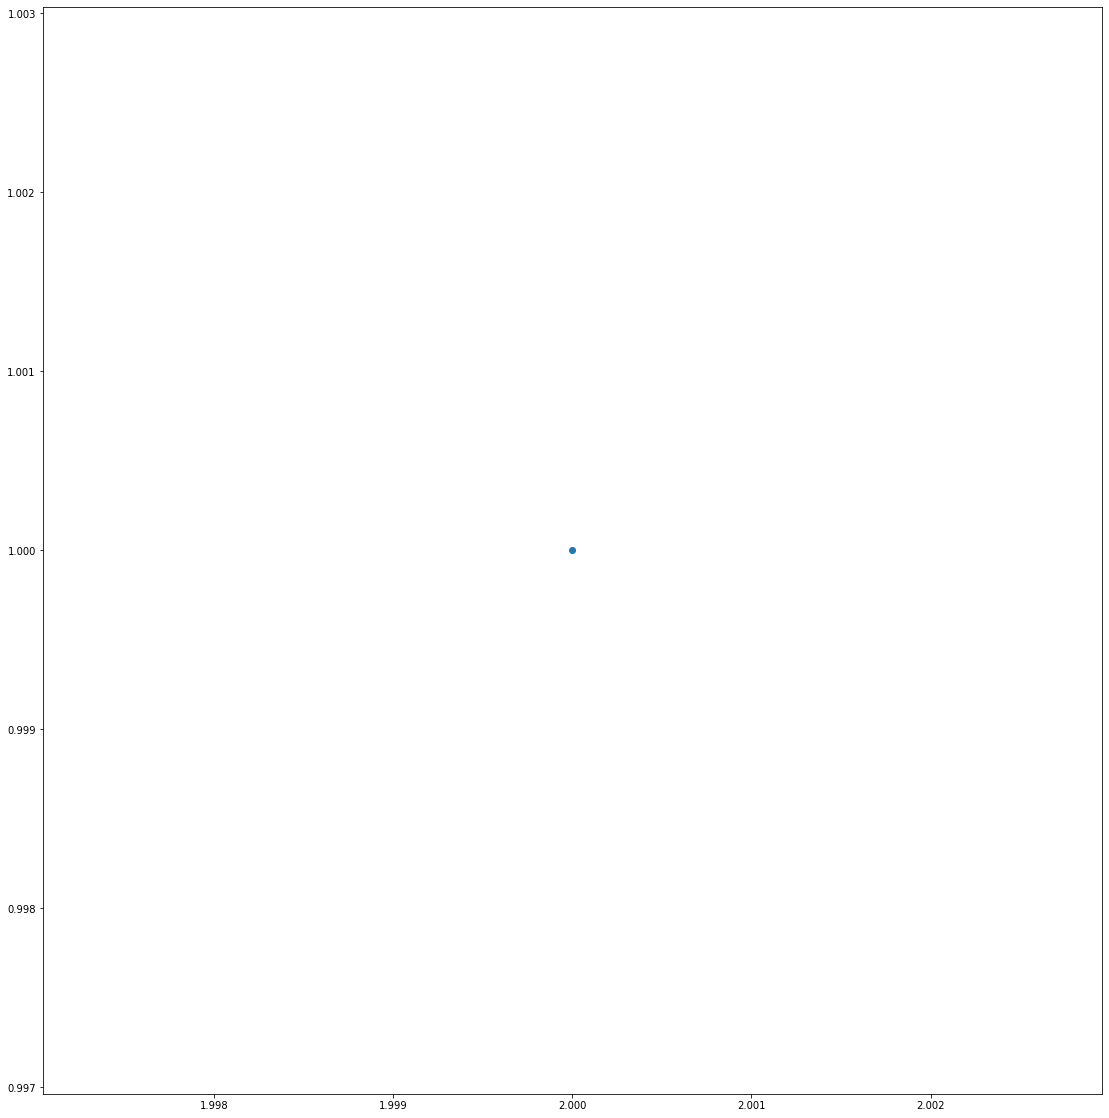

In [366]:
# gdf.total_bounds

# d = {'geometry': [Point(3, -1), Polygon([(0, 0), (1, 1), (1, 0)]),
# LineString([(0, 1), (1, 2)])]}
# gdf = geopandas.GeoDataFrame(d, crs="EPSG:1324")
# gdf.total_bounds
# array([ 0., -1.,  3.,  2.])

d = {'geometry': [Point(), Point(2,1), None]}
gdf = gpd.GeoDataFrame(d, crs="EPSG:1324")

gdf.plot()

# gdf.set_crs(epsg=1324, inplace=True)


# gdf.centroid

In [336]:
df['can_count'] = 1
dfVotes = df.groupby('ALAND').count()[['can_count']].reset_index()
dfVotes.sort_values('can_count', ascending=False).head(10)


# dfVotes.woof

gdf.dtypes

# df.dtypes

# dfVotes.head()

STATEFP     object
CD116FP     object
GEOID       object
NAMELSAD    object
LSAD        object
CDSESSN     object
MTFCC       object
FUNCSTAT    object
ALAND        int64
AWATER       int64
INTPTLAT    object
INTPTLON    object
geometry    object
dtype: object

In [337]:
# merged = gdf.set_index('GEOID').join(dfVotes.set_index('geoID'))
# merged = merged.reset_index()
# merged = merged.fillna(0)
# merged[['GEOID', 'INTPTLON', 'INTPTLAT', 'geometry', 'woof']].sample(5)

together = gdf.merge(dfVotes, how='left')
# together.fillna('', inplace=TRUE)
print(together)

    STATEFP CD116FP GEOID                   NAMELSAD LSAD CDSESSN  MTFCC  \
0        27      07  2707   Congressional District 7   C2     116  G5200   
1        27      02  2702   Congressional District 2   C2     116  G5200   
2        27      06  2706   Congressional District 6   C2     116  G5200   
3        27      08  2708   Congressional District 8   C2     116  G5200   
4        17      01  1701   Congressional District 1   C2     116  G5200   
..      ...     ...   ...                        ...  ...     ...    ...   
430      36      13  3613  Congressional District 13   C2     116  G5200   
431      36      26  3626  Congressional District 26   C2     116  G5200   
432      36      22  3622  Congressional District 22   C2     116  G5200   
433      36      09  3609   Congressional District 9   C2     116  G5200   
434      36      19  3619  Congressional District 19   C2     116  G5200   

    FUNCSTAT        ALAND       AWATER     INTPTLAT      INTPTLON  \
0          N  8658

Text(0.5, 1.0, 'Heat Map of Houses Sold by Neighbourhood in USA')

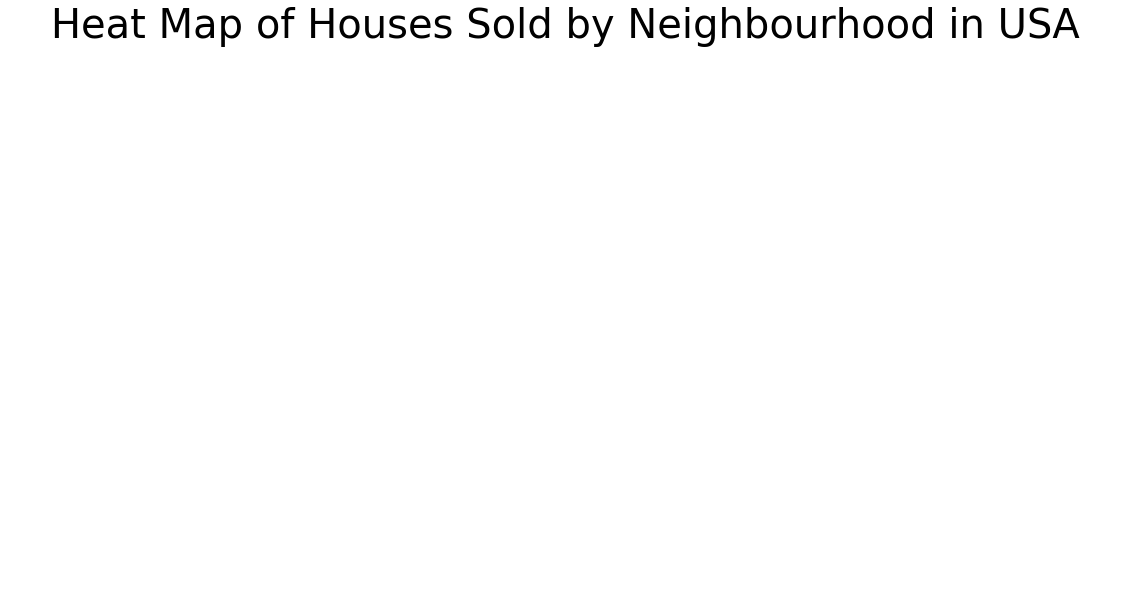

In [338]:
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('Heat Map of Houses Sold by Neighbourhood in USA',
             fontdict={'fontsize': '40', 'fontweight' : '3'})

In [339]:
color = 'Oranges'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

In [340]:
woof = together.plot('can_count', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

<Figure size 1440x1440 with 0 Axes>

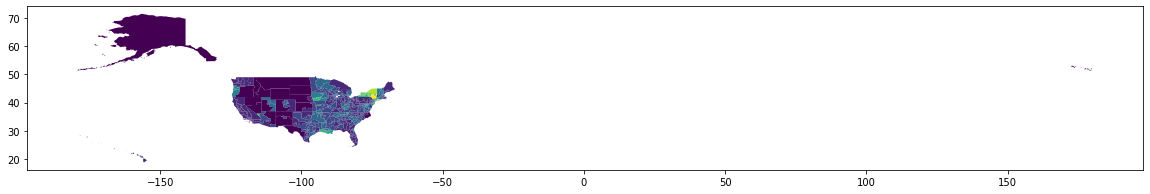

In [367]:
together.plot('can_count', figsize=(20,10), linewidth=0.8)